Prompt to image works well.
Trying init_image + prompt to new image set generation

In [1]:
from huggingface_hub import notebook_login

notebook_login()

In [1]:
import torch
from diffusers import StableDiffusionPipeline

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
# make sure you're logged in with `huggingface-cli login`
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", use_auth_token=True)

pipe = pipe.to(device)

cuda


c:\Users\maria\anaconda3\envs\cv3dr\lib\site-packages\diffusers\pipelines\pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
vae\diffusion_pytorch_model.safetensors not found
Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

c:\Users\maria\anaconda3\envs\cv3dr\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

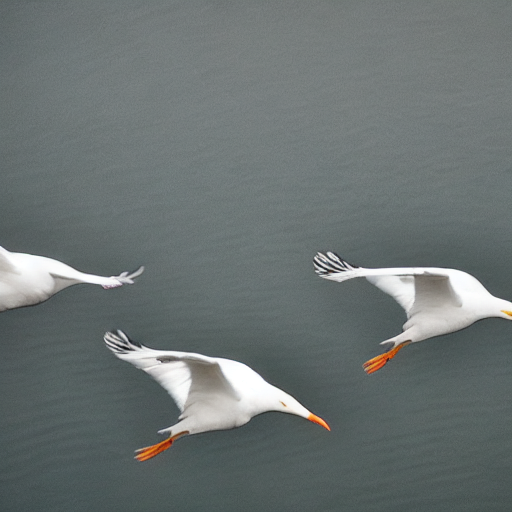

In [7]:
from torch import autocast
from PIL import Image
import warnings
warnings.filterwarnings("error")

generator = torch.Generator(device)

prompt = "A cheesy pepperoni pizza sitting on top of a pan. "
#init_image_path = ".\data\coco_food\\food_images\\all_food_train2017\\000000001059.jpg"
#pil_image = Image.open(init_image_path)

while True: 
  with autocast(device):
    image = pipe(prompt, generator=generator)[0][0]
    black_img = Image.new('RGB', image.size, (0, 0, 0))
    if image != black_img:
      break

# display image
image